In [5]:
import os

os.chdir('/ut3/jerome/github/research/project/ext_tools/eagles/')

In [13]:
li = 200
li_err = 10
teff_mean = 5000
teff_std = 50

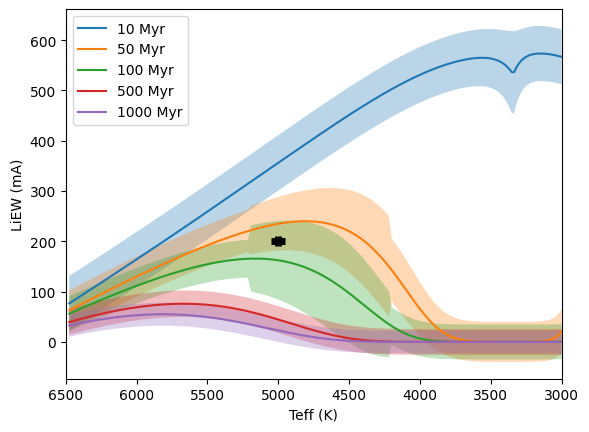

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# import the EWLi prediction model from the main EAGLES code
from eagles import AT2EWm
from eagles import eAT2EWm


# Modify the list below for the isochrones you want to produce (units are Myr)
# ages = [5, 10, 15, 20, 30, 50, 100, 300, 1000, 5000]
ages = [10, 50, 100, 500, 1000]

# e.g. for fewer isochrones
#ages = [10, 100, 1000]

# Modify this flag to true if you want the plot to include the dispersion
# look smessy if there are many closely spaced isochrones
plot_dispersion = True

# The step in logarithmic temperature
tstep = 0.002

# parameters for the plot

fig, ax = plt.subplots()
plt.xlabel('Teff (K)')
plt.ylabel('LiEW (mA)')
ax.set_xlim(6500, 3000)

# set up a an equally spaced set of log temperatures between 3000 and 6500 K
lteff = np.arange(3.4772, 3.8130, tstep)

# loop over the ages
for t in ages :

    lAge = np.log10(t)+6  # log age in years
    ewm = AT2EWm(lteff, lAge)
    eewm = eAT2EWm(lteff, lAge)

    # save the results as a simple .txt file    
    name = 'iso_'+str(t)+'.txt'
    np.savetxt(name, np.column_stack((10**lteff, ewm, eewm)), fmt='%.1f %.1f %.1f', delimiter=' ', header = "Teff(K) EWLim(mA) eEWLi(mA)")
 
    ax.plot(10**lteff, ewm, label='%s Myr' %t)

    # if the plot_dispersion flag then shade the dispersion region
    # looks quite messy if there are lots of isochrones because of the overlap
    if plot_dispersion :
        plt.fill_between(10**lteff, ewm-eewm, ewm+eewm, alpha=0.3)

# For the default list of ages and plot_dispersion = False, this is Fig.2 from the paper    

if len(ages) <6 :
    plt.legend()
else :
    ax.text(0.01,0.95, str(ages)+" Myr", transform=ax.transAxes)

if li is None:
    ax.axvline(teff_mean, c='k', ls='--')
else:
    ax.errorbar(teff_mean, li, yerr=li_err, xerr=teff_std, zorder=10, lw=5, c='k')
    if li<10:
        plt.yscale('log')
        plt.ylim(1e-1, 1e3)